------------------------------------------------------------------------------------------------------------
Number of Ticks = 1000
Number of simulations:  100

Het median Ratio:  0.9548295764743066
Pi median Ratio:  0.9550424118964125
Wa median Ratio:  0.7824143785608011

Expected Teta = 4*Ne*mu =  0.0015
Median Het Autosome:  0.000282796
Median Pi Autosome:  0.00028298699999999995
Median Wa Autosome:  0.0007522345


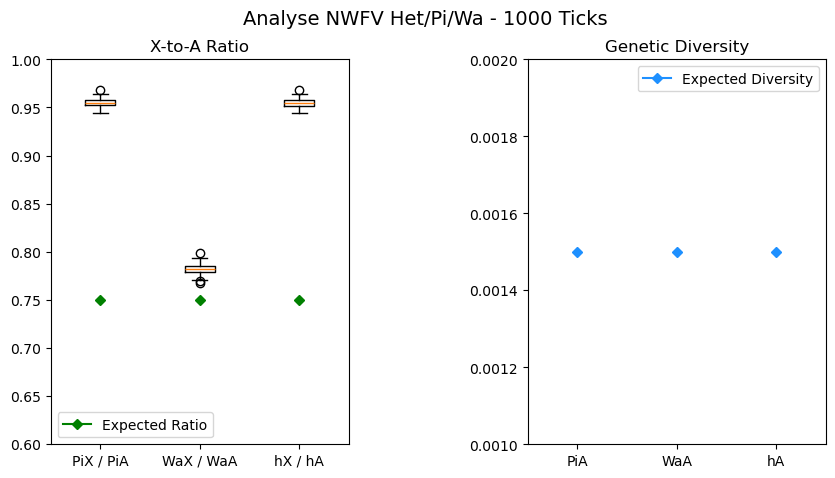

------------------------------------------------------------------------------------------------------------
Number of Ticks = 5000
Number of simulations:  100

Het median Ratio:  0.8368487155967328
Pi median Ratio:  0.8370388207148731
Wa median Ratio:  0.7761413959849307

Expected Teta = 4*Ne*mu =  0.0015
Median Het Autosome:  0.0008558825
Median Pi Autosome:  0.0008564785
Median Wa Autosome:  0.000998192


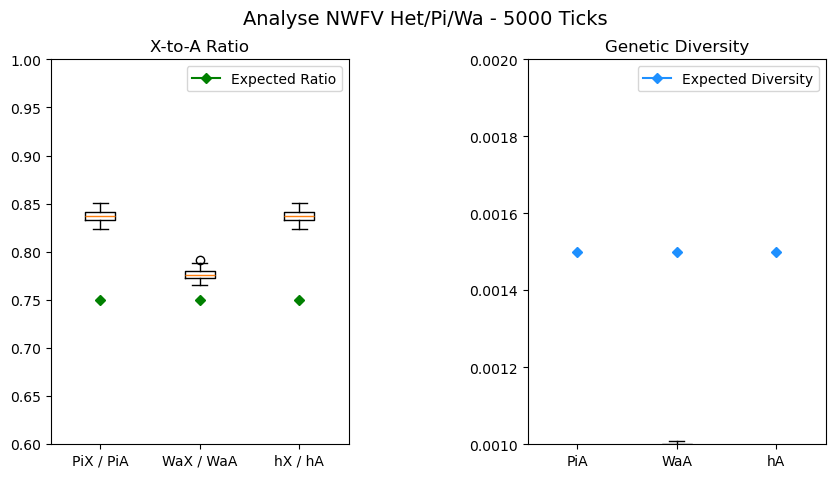

------------------------------------------------------------------------------------------------------------
Number of Ticks = 10000
Number of simulations:  100

Het median Ratio:  0.775019159682518
Pi median Ratio:  0.7751850600921399
Wa median Ratio:  0.7577795433740456

Expected Teta = 4*Ne*mu =  0.0015
Median Het Autosome:  0.001053855
Median Pi Autosome:  0.0010545849999999998
Median Wa Autosome:  0.0010745099999999999


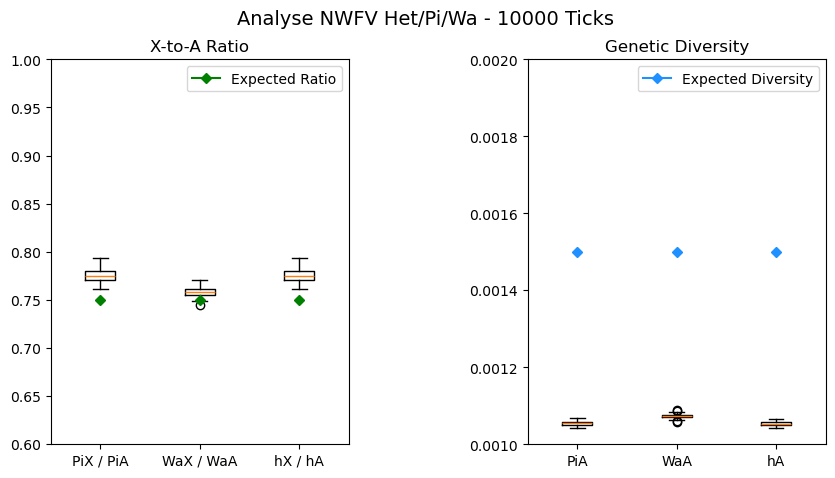

------------------------------------------------------------------------------------------------------------
Number of Ticks = 20000
Number of simulations:  100

Het median Ratio:  0.7498855436570322
Pi median Ratio:  0.7500459171010168
Wa median Ratio:  0.7490201210980307

Expected Teta = 4*Ne*mu =  0.0015
Median Het Autosome:  0.001109255
Median Pi Autosome:  0.00110998
Median Wa Autosome:  0.00109588


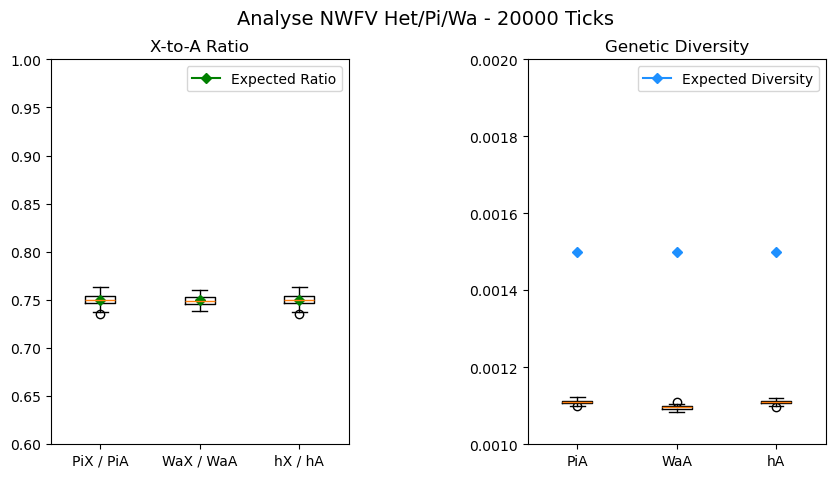

------------------------------------------------------------------------------------------------------------
Number of Ticks = 50000
Number of simulations:  4

Het median Ratio:  0.7520515454222831
Pi median Ratio:  0.7522249359882152
Wa median Ratio:  0.7515410906122991

Expected Teta = 4*Ne*mu =  0.0015
Median Het Autosome:  0.001111585
Median Pi Autosome:  0.001112325
Median Wa Autosome:  0.0010972299999999998


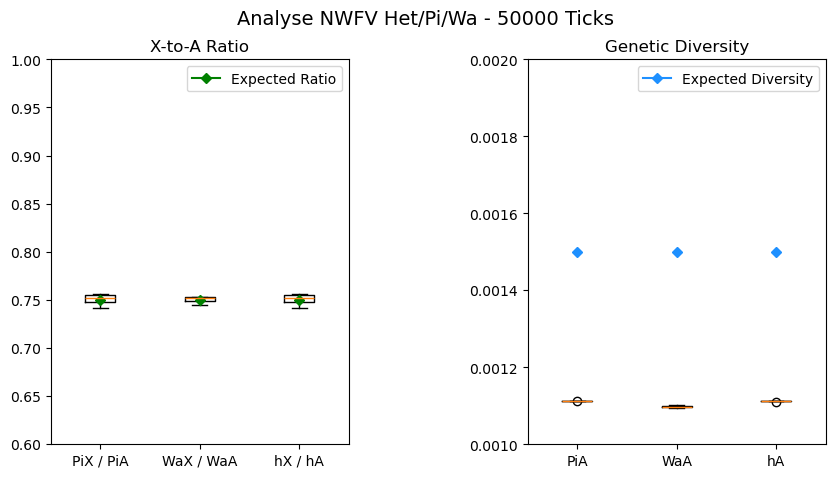

In [3]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/NWFV_HetPiWa_TICKS/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_Vanilla/NWFV_HetPiWa_TICKS/"
Lticks=[1000,5000,10000,20000,50000]
expected_ratio = 0.75
expected_teta = round (4*750*40*1.25e-8,10)

for NTICKS in Lticks:
    Pi_ratio = []
    Wa_ratio = []
    Het_ratio = []
    PiA = []
    WaA = []
    HetA = []
    for NUM in range(1,501):
        File = FOLDER+"NWFV_HetPiWa_NTicks"+str(NTICKS)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            Het_ratio.append(float(Values[1])/float(Values[0]))
            Wa_ratio.append(float(Values[4])/float(Values[3]))
            Pi_ratio.append(float(Values[7])/float(Values[6]))
            HetA.append(float(Values[0]))
            WaA.append(float(Values[3]))
            PiA.append(float(Values[6]))
            Text.close()

    Het_median = np.median(Het_ratio)
    Pi_median = np.median(Pi_ratio)
    Wa_median = np.median(Wa_ratio)
    HetA_mean = np.median(HetA)
    PiA_mean = np.median(PiA)
    WaA_mean = np.median(WaA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Number of Ticks = "+str(NTICKS))
    print("Number of simulations: ",len(Pi_ratio))
    print()
    print("Het median Ratio: ",Het_median)
    print("Pi median Ratio: ",Pi_median)
    print("Wa median Ratio: ",Wa_median)
    print()
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print("Median Het Autosome: ",HetA_mean)
    print("Median Pi Autosome: ",PiA_mean)
    print("Median Wa Autosome: ",WaA_mean)
    
    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    fig.subplots_adjust(wspace=0.6)
    fig.suptitle(f"Analyse NWFV Het/Pi/Wa - {NTICKS} Ticks", fontsize=14)
    
    ax[0].boxplot([Pi_ratio,Wa_ratio,Het_ratio],tick_labels=["PiX / PiA","WaX / WaA","hX / hA"])
    ax[0].set_title("X-to-A Ratio")
    ax[0].set_ylim([0.6, 1])
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].plot(3, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].legend()
    
    ax[1].boxplot([PiA,WaA,HetA],tick_labels=["PiA","WaA","hA"])
    ax[1].set_title("Genetic Diversity")
    ax[1].set_ylim([1e-3, 2e-3])
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].plot(3, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].legend()

    fig.savefig(FOLDER_output+'NWFV_PiWa_Ticks'+str(NTICKS)+'.png') 

    mp.show()

